In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("diabetes_dataset.csv")
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

Therefore, the dataset has no duplicates or null values.

Note that, some features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI have zero values, which is absurd. So, we treat the zeros in these columns as NaN values

In [11]:
df_copy = df.copy(deep = True)
columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df_copy[columns] = df_copy[columns].replace(0,np.nan)

print(df_copy.isnull().sum())

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [14]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


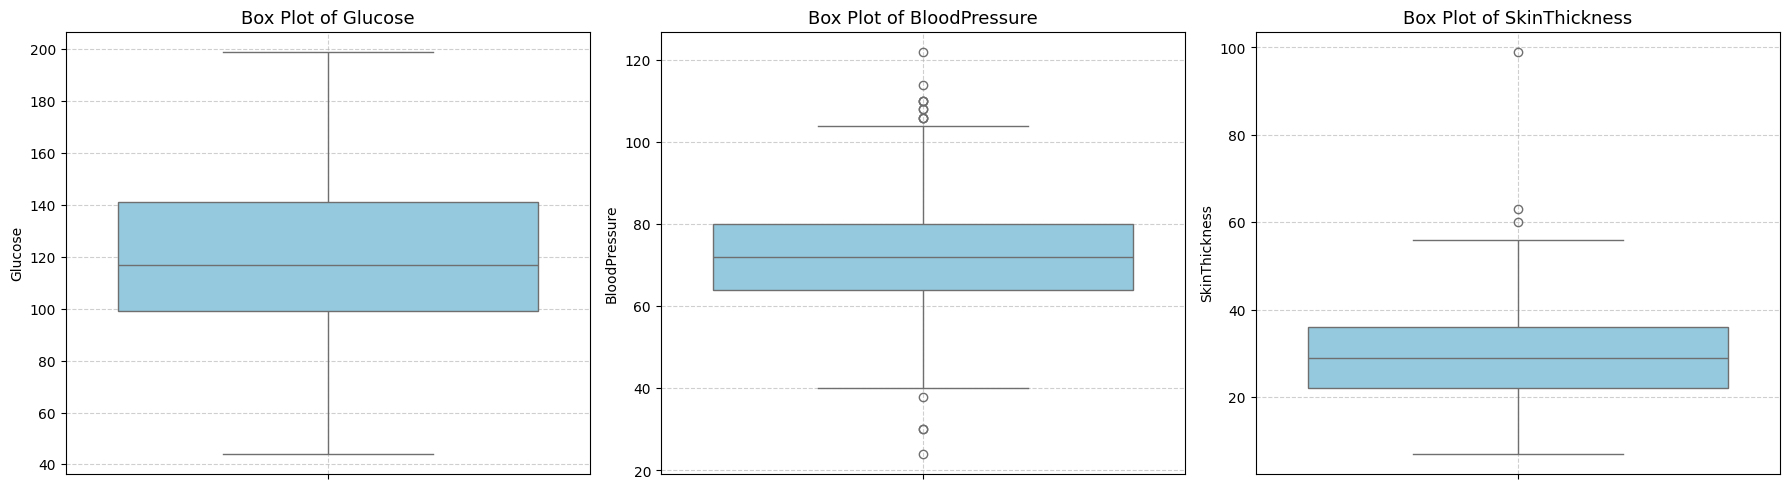

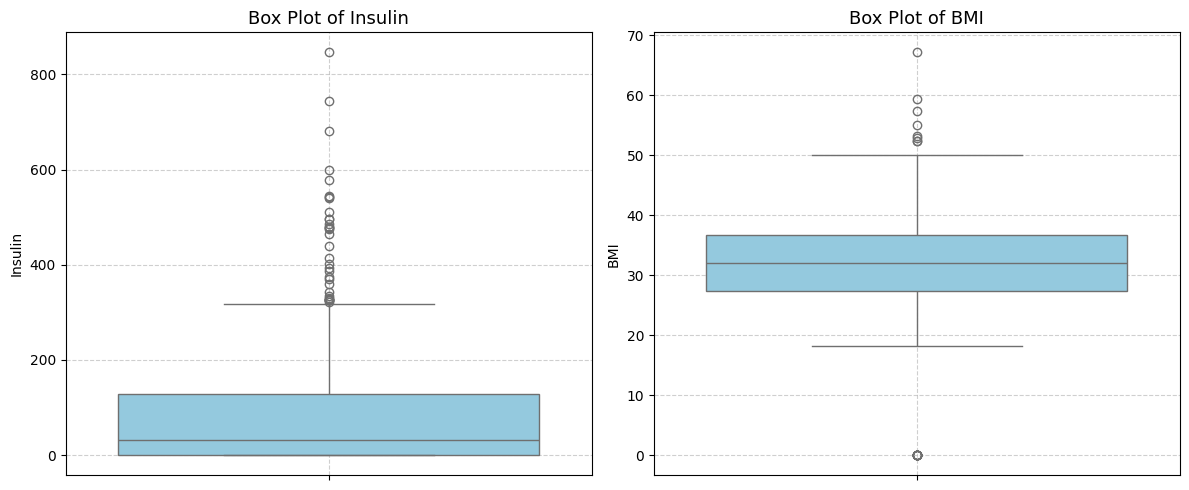

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  


for i, col in enumerate(columns[:3]):
    sns.boxplot(y=df_copy[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {col}', fontsize=13)
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(columns[3:]):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {col}', fontsize=13)
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [16]:

df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

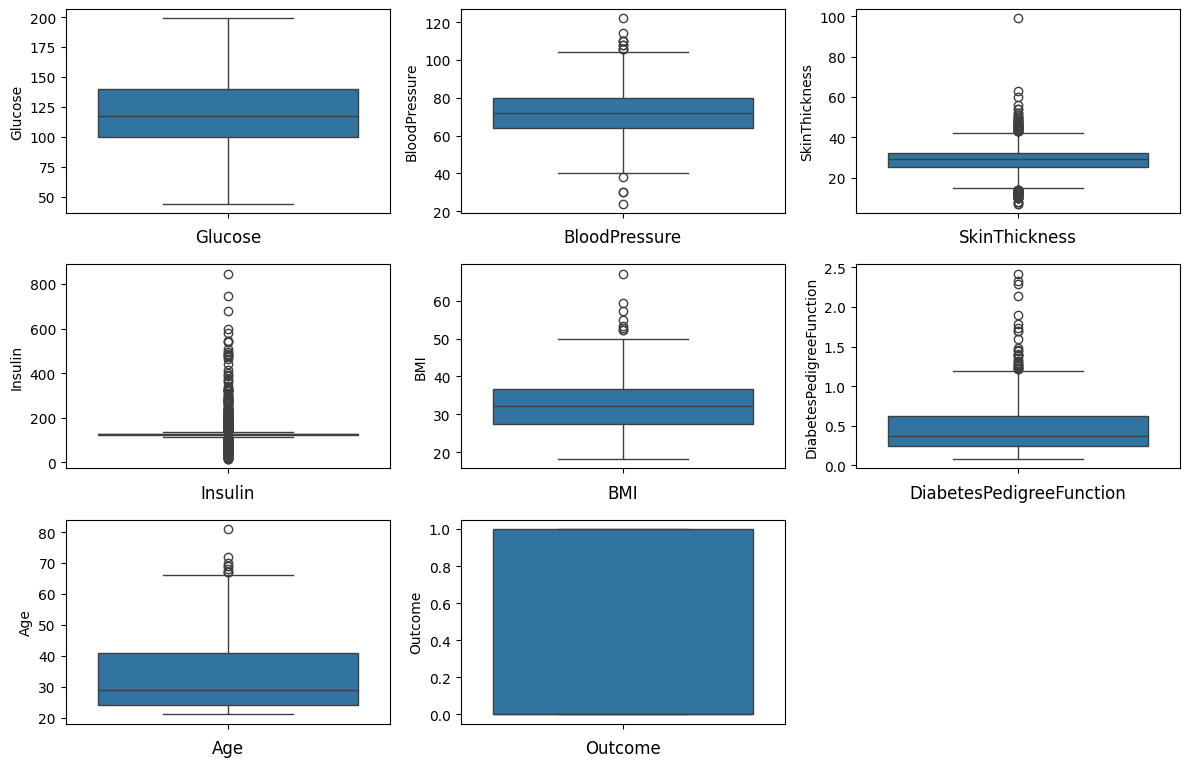

In [17]:

plt.figure(figsize = (12,10))
plot_no = 1
for i in df_copy.columns:
    ax = plt.subplot(4,3, plot_no)
    sns.boxplot(df_copy[i])
    plt.xlabel(i, fontsize=12)
    plot_no +=1
plt.tight_layout()
plt.show()

In [19]:
def outlier_capping(dataframe: pd.DataFrame, outliers:list):
    capped_df = dataframe.copy()
    for i in outliers:
        q1 = capped_df[i].quantile(0.25)
        q3 = capped_df[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 *iqr
        lower_limit = q1 - 1.5 *iqr
        capped_df.loc[capped_df[i] >upper_limit, i] = upper_limit
        capped_df.loc[capped_df[i] <lower_limit, i] = lower_limit
        return capped_df

In [20]:
df_filtered=outlier_capping(df_copy,df_copy.columns)

In [21]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


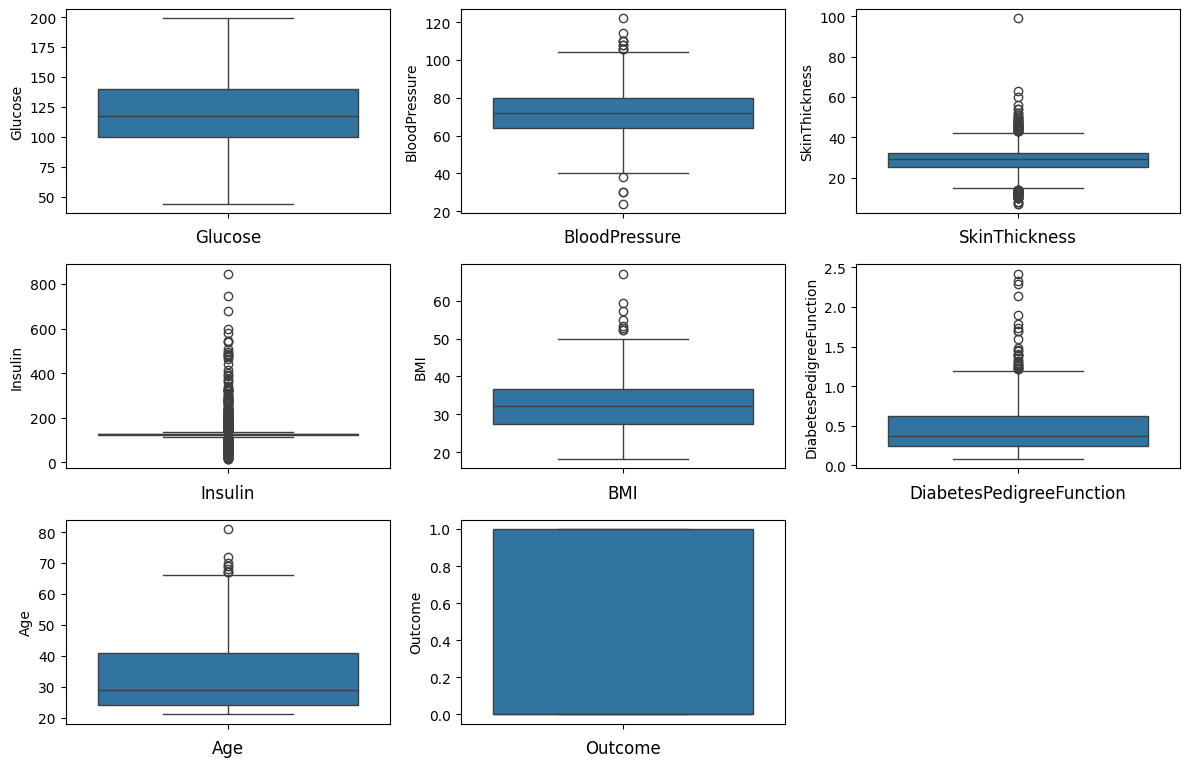

In [22]:

plt.figure(figsize = (12,10))
plot_no = 1
for i in df_filtered.columns:
    ax = plt.subplot(4,3, plot_no)
    sns.boxplot(df_filtered[i])
    plt.xlabel(i, fontsize=12)
    plot_no +=1
plt.tight_layout()
plt.show()

Some Basic Plots

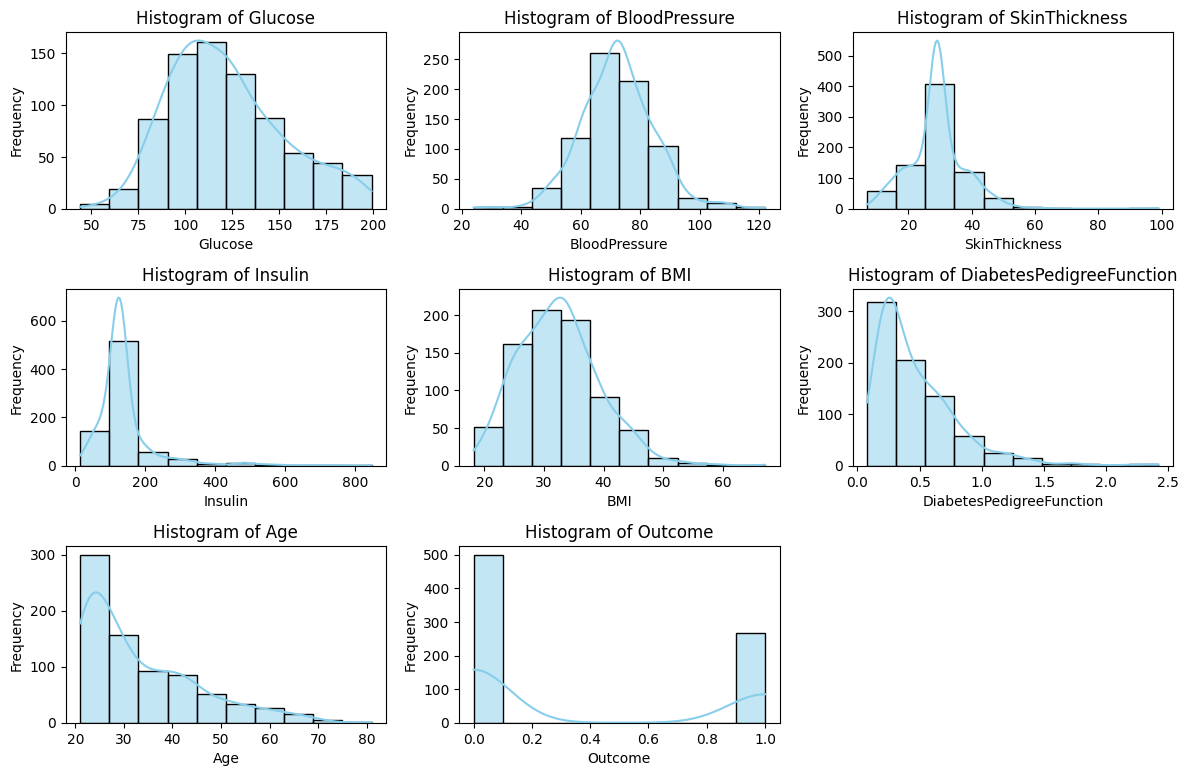

In [24]:
plt.figure(figsize = (12,10))
plot_no = 1
for column in df_filtered.columns:
    ax = plt.subplot(4,3, plot_no)
    sns.histplot(df_filtered[column], bins=10, color='skyblue', edgecolor='black',kde=True)  # Plot histogram
    plt.xlabel(column) 
    plt.ylabel('Frequency') 
    plt.title('Histogram of {}'.format(column))
    plot_no +=1 
plt.tight_layout()
plt.show()  

Outcome
0    500
1    268
Name: count, dtype: int64


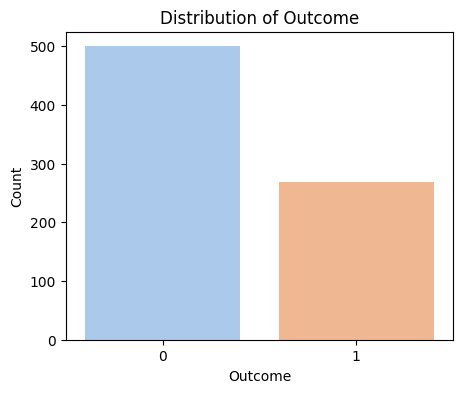

In [26]:
print(df_filtered.Outcome.value_counts())
plt.figure(figsize=(5,4))
sns.barplot(x=df_filtered.Outcome.value_counts().index, y=df_filtered.Outcome.value_counts(),  palette='pastel')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')
plt.show()

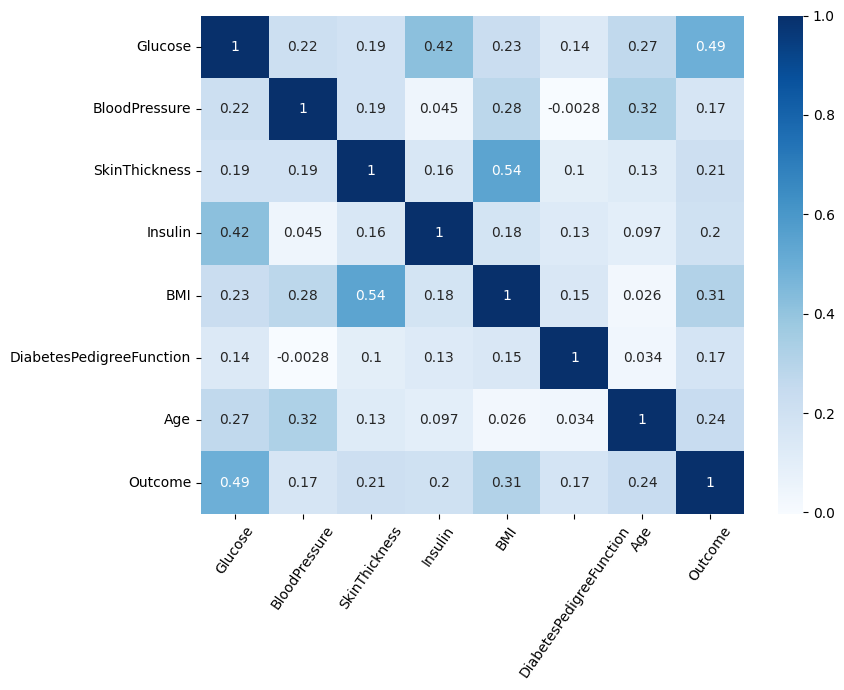

In [27]:

plt.figure(figsize=(9, 7))  # Increase the figure size
p = sns.heatmap(df_filtered.corr(), annot=True, cmap='Blues')
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

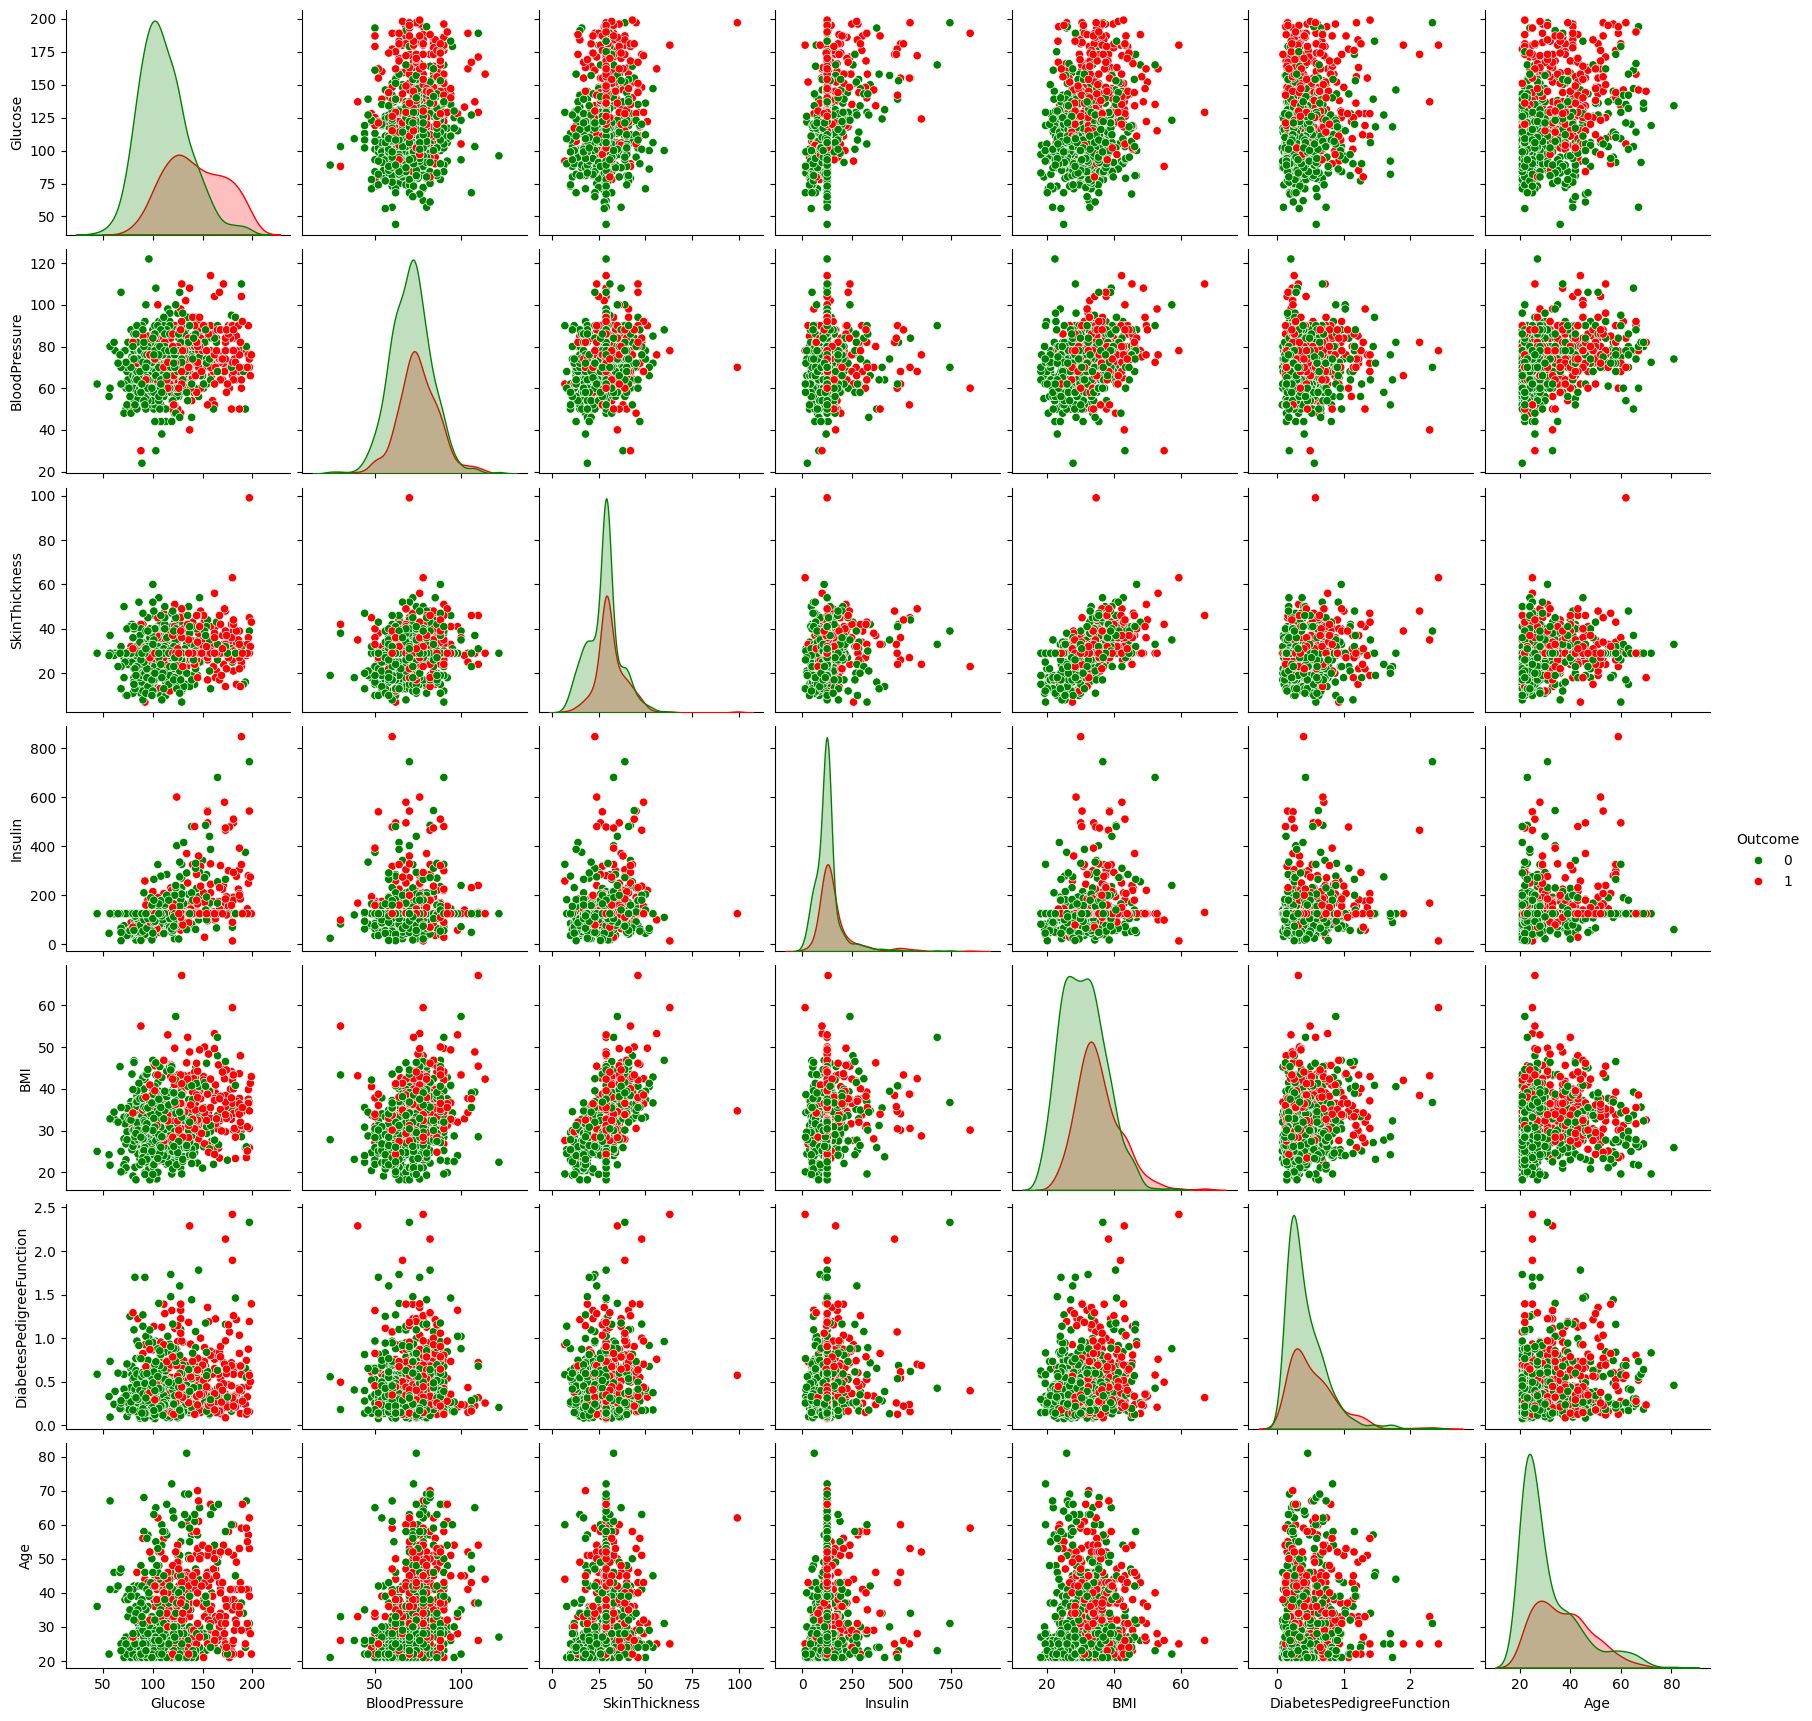

In [31]:
sns.pairplot(df_filtered, hue='Outcome', palette={0: "green", 1: "red"})


In [29]:

X=df_filtered.drop(['Outcome'],axis=1)
y=df['Outcome']

In [33]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
score_list = {} 

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
score_list = {} 

In [41]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


Logistic Regression

In [36]:

from sklearn.linear_model import LogisticRegression
lc=LogisticRegression()

In [37]:
lc.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred=lc.predict(X_test)

In [39]:
score=lc.score(X_test,y_test)
score_list["Logistic Regression"] = score
print(f"Score is {score}")

Score is 0.8116883116883117


In [42]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



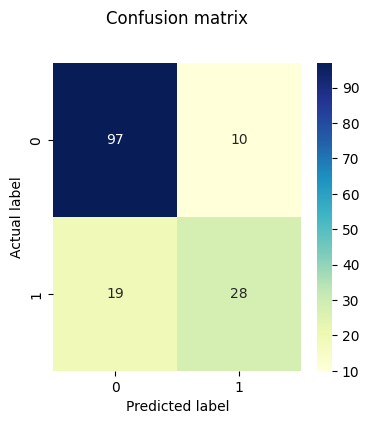

In [43]:
plt.figure(figsize=(4,4))
cnf_matrix_lc = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_lc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
y_pred_proba = lc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

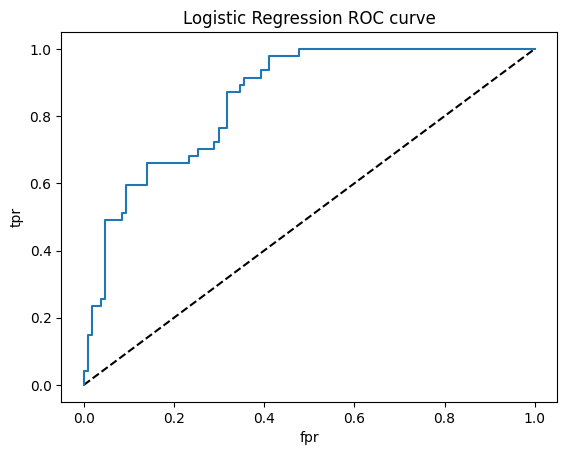

In [45]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

In [46]:
roc_auc_score(y_test,y_pred_proba)

np.float64(0.8530522966792603)

K-Nearest Neighbours

In [51]:

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn_score = knn.score(X_test,y_test)
score_list["KNN Classifier"] = knn_score
print(f"Score is {knn_score}")

Score is 0.7987012987012987


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154



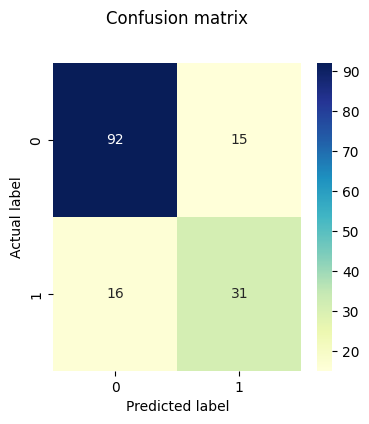

In [53]:

plt.figure(figsize=(4,4))
cnf_matrix_knn = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

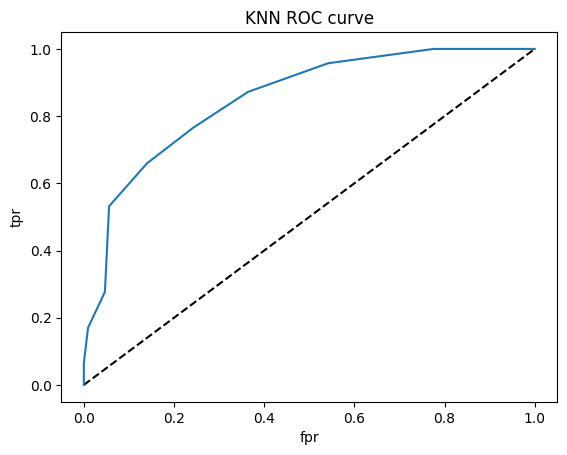

In [54]:

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN ROC curve')
plt.show()

In [55]:
print("The AUC score of KNN is :",roc_auc_score(y_test,y_pred_proba)) 

The AUC score of KNN is : 0.8515609465102406


Support Vector Classifier

In [57]:
from sklearn.svm import SVC 

svc = SVC(random_state=0,probability=True)
svc.fit(X_train,y_train)
svc_score = svc.score(X_test,y_test)
y_pred = svc.predict(X_test)
score_list["Support Vector Classifier"] = svc_score
print(f"Score is {svc_score}")

Score is 0.7727272727272727


In [58]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       107
           1       0.65      0.55      0.60        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.77      0.77      0.77       154



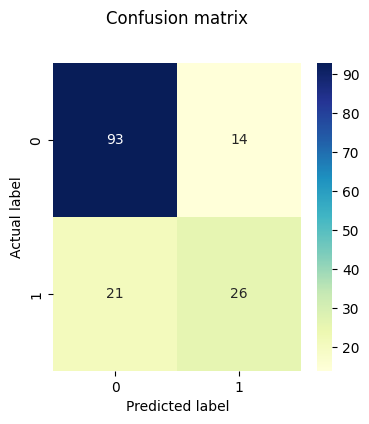

In [59]:
plt.figure(figsize=(4,4))
cnf_matrix_svm = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

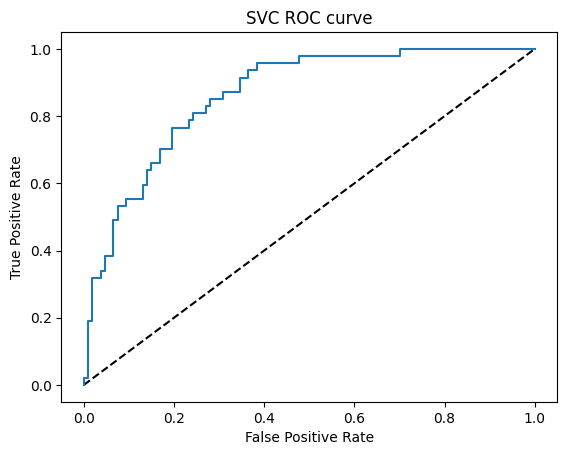

In [60]:

y_pred_decision = svc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC curve')
plt.show()

In [61]:
print("The AUC score of SVC is :",roc_auc_score(y_test,y_pred_decision))

The AUC score of SVC is : 0.8625969377609862


In [62]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train)
nbc_score = nbc.score(X_test,y_test)
y_pred = nbc.predict(X_test)
score_list["GaussianNBC"] = nbc_score

print(f"Score is {nbc_score}")

Score is 0.7727272727272727


In [63]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       107
           1       0.64      0.57      0.61        47

    accuracy                           0.77       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.77      0.77      0.77       154



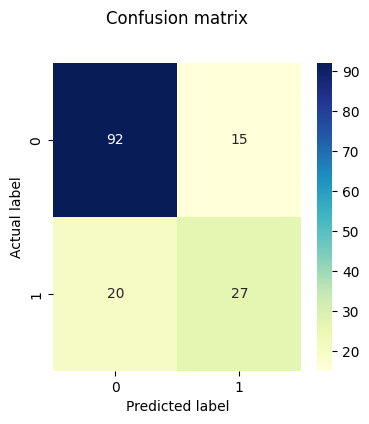

In [64]:
plt.figure(figsize=(4,4))
cnf_matrix_nbc = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_nbc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

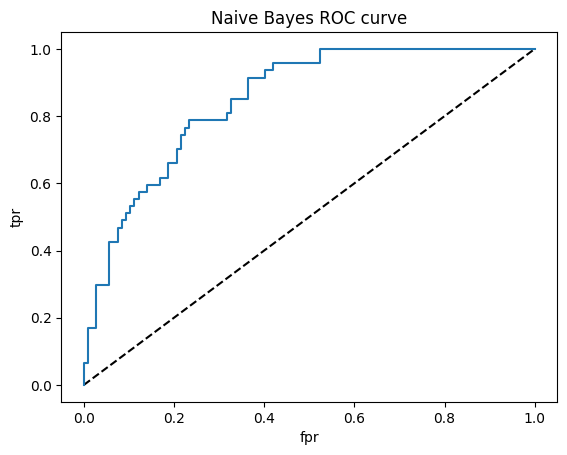

In [65]:

y_pred_proba = nbc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes ROC curve')
plt.show()

In [66]:
print("The AUC score of Naive Bayes is :",roc_auc_score(y_test,y_pred_proba)) 

The AUC score of Naive Bayes is : 0.8482799761383973


Decision Tree classifier

In [67]:

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
dtc_score = dtc.score(X_test,y_test)
score_list["Decision Trees Classifier"] = dtc_score
print(f"Score is {dtc_score}")

Score is 0.7467532467532467


In [68]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       107
           1       0.57      0.66      0.61        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



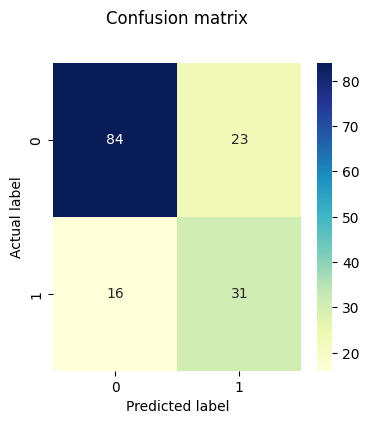

In [69]:

plt.figure(figsize=(4,4))
cnf_matrix_dtc = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

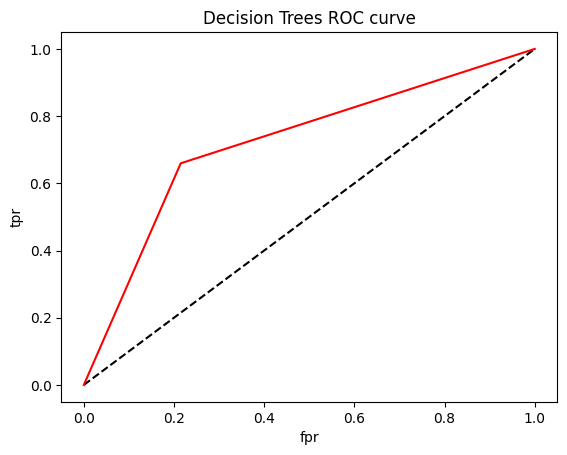

In [70]:

y_pred_proba = dtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Decision Tree',color='r')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Decision Trees ROC curve')
plt.show()

In [71]:
print("The AUC score of Decision Trees Classifier is :",roc_auc_score(y_test,y_pred_proba)) 

The AUC score of Decision Trees Classifier is : 0.7223105985285345


Final ROC curve

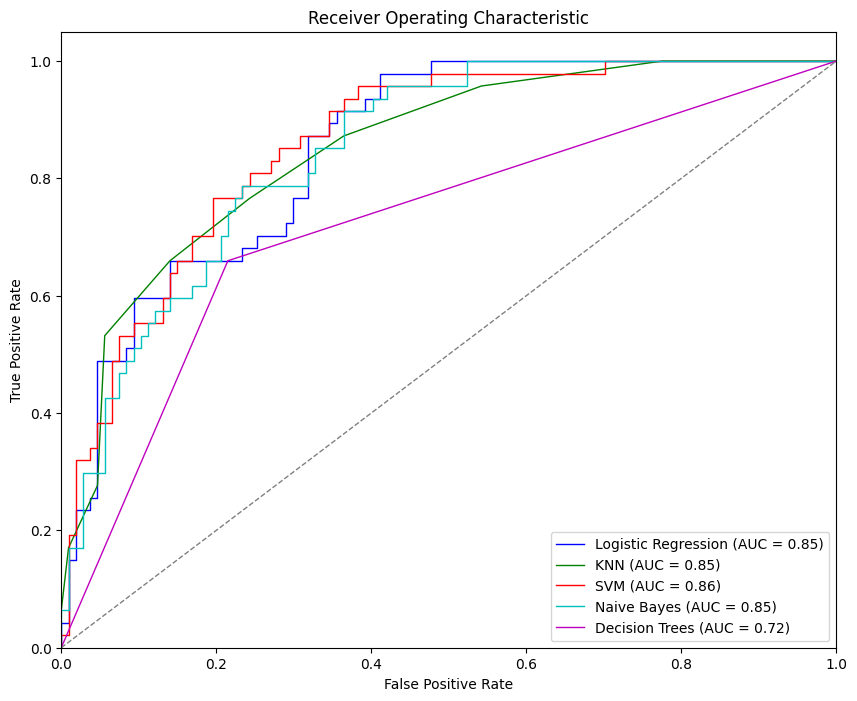

In [72]:
from sklearn.metrics import auc

classifiers = [lc, knn, svc, nbc, dtc]
labels = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Trees']
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(10, 8))

for clf, label, color in zip(classifiers, labels, colors):
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=1, label=label + ' (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [74]:
scores=pd.DataFrame(list(score_list.items()), columns=['Classifier', 'Score'])
scores

,Classifier,Score
0,Logistic Regression,0.811688
1,KNN Classifier,0.798701
2,Support Vector Classifier,0.772727
3,GaussianNBC,0.772727
4,Decision Trees Classifier,0.746753


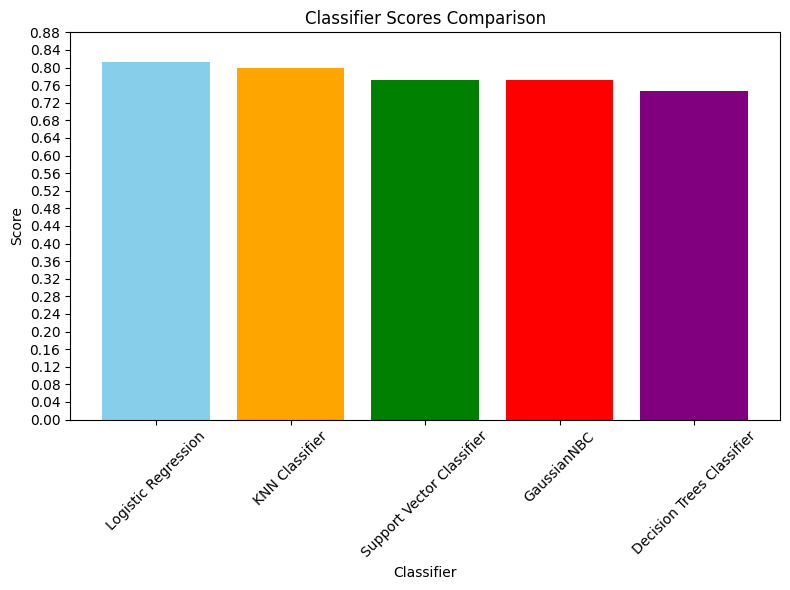

In [75]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink'] 
plt.figure(figsize=(8, 6))
plt.bar(scores['Classifier'], scores['Score'], color=colors)
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Classifier Scores Comparison')
plt.yticks([i/25 for i in range(23)])
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()